In [3]:
import cv2
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import matplotlib.pyplot as plt


from sklearn.datasets import fetch_openml  # veri kümesi için kullanılır
from skimage.filters import threshold_otsu


from sklearn.tree import DecisionTreeClassifier # karar ağacı sınıflandırma modeli
from sklearn.ensemble import RandomForestClassifier # rastgele orman sınıflandırma modeli

from sklearn.metrics import accuracy_score # başarım ölçütü
from sklearn.metrics import f1_score # başarım ölçütü

from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay # confusion matrix hesaplama ve gösterimi

import numpy as np

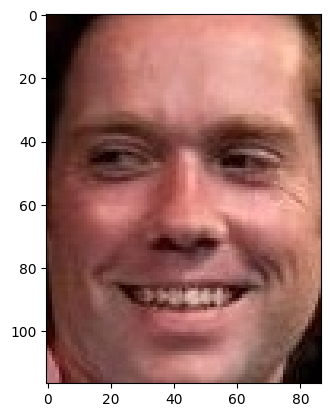

In [4]:
data = cv2.imread("data/Training/male/090544.jpg.jpg")
data = cv2.cvtColor(data , cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(data ,cmap="gray")

In [5]:
location = "data/Training/"

In [6]:
location_2 = "data/Validation/"

In [7]:
training_data = []

In [8]:
validation_data = []

In [9]:
gender = ["male" , "female"]

In [10]:
for x in gender:
    num_gender = gender.index(x)
    for i in os.listdir(location+str(x)):
        data = cv2.imread(location + x + "/" + str(i) )
        data_1 = cv2.cvtColor(data , cv2.COLOR_BGR2GRAY)
        data_2 = cv2.resize(data_1 , (50,50))
        training_data.append([data_2 , num_gender])
    

In [11]:
main_data = pd.DataFrame(training_data)

In [12]:
main_data['Gender'] = main_data[1]
del main_data[1]

In [13]:
main_data['Images'] = main_data[0]

In [14]:
del main_data[0]

In [15]:
main_data

,Gender,Images
0,0,"[[41, 67, 91, 110, 128, 142, 158, 166, 171, 17..."
1,0,"[[15, 2, 11, 21, 15, 7, 10, 10, 9, 6, 15, 34, ..."
2,0,"[[17, 18, 33, 49, 73, 83, 76, 77, 74, 74, 76, ..."
3,0,"[[31, 31, 31, 29, 31, 36, 46, 61, 79, 93, 98, ..."
4,0,"[[84, 48, 41, 42, 38, 51, 47, 45, 25, 25, 69, ..."
...,...,...
58653,1,"[[102, 95, 92, 79, 75, 65, 62, 67, 68, 85, 107..."
58654,1,"[[20, 23, 38, 10, 52, 57, 42, 34, 43, 60, 52, ..."
58655,1,"[[22, 14, 21, 18, 19, 25, 21, 17, 24, 18, 17, ..."
58656,1,"[[45, 15, 20, 59, 91, 114, 131, 140, 149, 155,..."


In [16]:
X_clean = []
for image in main_data["Images"] :
    threshold_value = threshold_otsu(image)
    binary_image = image > threshold_value
    X_clean.append(binary_image.flatten())

In [17]:
x_train , x_test , y_train , y_test = train_test_split(X_clean , main_data["Gender"] , test_size=0.2 , random_state=42)

In [18]:
len(x_train)

46926

In [19]:
len(x_test)

11732

In [20]:
model = RandomForestClassifier()

# model eğitimi
model.fit(x_train , y_train)

# test veri kümesi üzerinden tahmin yapılması

y_pred = model.predict(x_test)

In [21]:
y_pred

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [22]:
accuracy = accuracy_score(y_test , y_pred)
print("accuracy: " , accuracy)

accuracy:  0.8558643027616775


In [23]:
f1_score = f1_score(y_test , y_pred , average="weighted")
print("f1 score: " , f1_score)

f1 score:  0.8557597386656451


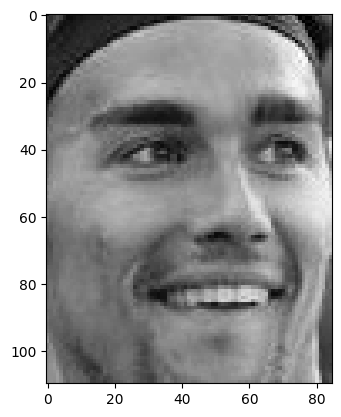

In [30]:
# we put example image from out

image = cv2.imread('data/Validation/male/063474.jpg.jpg')
image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(image , cmap="gray")

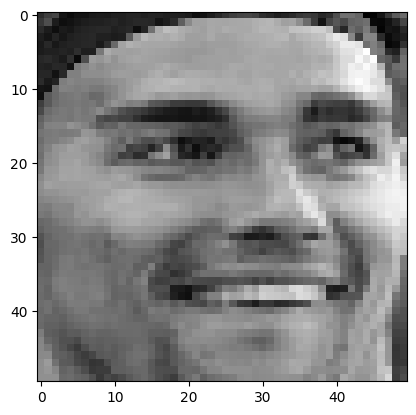

In [31]:
image = cv2.resize(image , (50,50))
plt.figure()
plt.imshow(image , cmap="gray")

In [32]:
image_array = np.array(image)

threshold_value = threshold_otsu(image)
binary_image = image > threshold_value
image_array = binary_image.flatten()

image_array = image_array.reshape(1,-1)

In [33]:
prediction= model.predict(image_array)
print("prediction: " , prediction)

prediction:  [0]
